# Assignment: Building a Decision Tree Classifier

Objective: The goal of this assignment is to use IRIS dataset to train a decision tree classifier and make predictions on new data.

Dataset: The dataset used for this assignment is the Iris dataset, which can be found on the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Iris). The Iris dataset contains 150 samples of iris flowers, with 4 features (sepal length, sepal width, petal length, petal width) and 3 classes (Iris-setosa, Iris-versicolor, Iris-virginica).

Task 1: Download and load the Iris dataset

Download the Iris dataset from the UCI Machine Learning Repository and save it to your local machine.
Use Python's pandas library to load the Iris dataset into a DataFrame.
Split the dataset into training and test sets.
Task 2: Train a decision tree classifier

Use the scikit-learn library to train a decision tree classifier on the training data.
Use the trained classifier to make predictions on the test data.
Evaluate the performance of the classifier by calculating the accuracy, precision, recall, and F1-score.
Task 3: Visualize the decision tree

Use the scikit-learn library to export the decision tree in the form of a .dot file.
Use the graphviz/matplotlib library to visualize the decision tree.
Task 4: Predicting on new data

Use the trained decision tree classifier to make predictions on new iris flower samples.
Submissions:

A PDF copy of Jupyter notebook with the code and explanation of each step.
The final visualized decision tree.

## Import Libraries

* "import pandas as pd" is used for data manipulation and analysis.
* "import numpy as np" is used for numerical computations and operations.
* "from sklearn.model_selection import train_test_split" is used to split data into training and testing sets.
* "from sklearn.tree import DecisionTreeClassifier" is used to create and fit a decision tree model.
* "import matplotlib.pyplot as plt" is used for creating visualizations.
* "from sklearn import tree" is used to create and visualize decision trees.
* The code imports several performance evaluation metrics from the sklearn.metrics module of scikit-learn library. The imported metrics are:

1. precision_score: It is a metric for evaluating the precision of a classifier, which is defined as the number of true positive predictions divided by the sum of true positive and false positive predictions.

2. recall_score: It is a metric for evaluating the recall of a classifier, which is defined as the number of true positive predictions divided by the sum of true positive and false negative predictions.

3. f1_score: It is a metric that combines precision and recall into a single score, representing the harmonic mean of precision and recall.

4. accuracy_score: It is a simple metric for evaluating the accuracy of a classifier, which is defined as the number of correct predictions divided by the total number of predictions.

* "from pandas_profiling import ProfileReport" is used to create a detailed report of a data set.
* "from IPython.core.display import display, HTML" is used to display HTML in Jupyter notebook.
* the os library, which is a built-in Python library for interacting with the operating system and performing various system-related operations such as reading or writing files, navigating file directories, and more.
* the graphviz library, which is a library for creating and visualizing graph diagrams. It provides a simple way to generate graphs in a variety of formats and visualize them, for purposes such as data visualization, network visualization, and more.

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from pandas_profiling import ProfileReport
from IPython.core.display import display, HTML
import os
import graphviz

The code modifies the PATH environment variable by adding the specified path to the end of its current value, separated by the platform-specific path separator (os.pathsep). The purpose is to add the path to the bin directory of Graphviz installation to the system's PATH, so that it can be used by the program. This makes it possible for the program to find and execute the Graphviz executables required for visualization.

In [27]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

## Import Dataset

The pandas library to read a CSV file named 'iris.data' and assigns the resulting DataFrame to the variable 'df'. The 'names' parameter is used to specify the column names for the dataframe as ('Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Classes').

In [2]:
df = pd.read_csv('iris.data', names=('Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Classes'))

The 'to_string()' method to convert the DataFrame 'df' to a string, and then it prints the string representation of the DataFrame. The 'to_string()' method will convert the DataFrame to a string representation and display the entire DataFrame, including all rows and columns, regardless of the size of the DataFrame.

In [3]:
print(df.to_string())

     Sepal_length  Sepal_width  Petal_length  Petal_width          Classes
0             5.1          3.5           1.4          0.2      Iris-setosa
1             4.9          3.0           1.4          0.2      Iris-setosa
2             4.7          3.2           1.3          0.2      Iris-setosa
3             4.6          3.1           1.5          0.2      Iris-setosa
4             5.0          3.6           1.4          0.2      Iris-setosa
5             5.4          3.9           1.7          0.4      Iris-setosa
6             4.6          3.4           1.4          0.3      Iris-setosa
7             5.0          3.4           1.5          0.2      Iris-setosa
8             4.4          2.9           1.4          0.2      Iris-setosa
9             4.9          3.1           1.5          0.1      Iris-setosa
10            5.4          3.7           1.5          0.2      Iris-setosa
11            4.8          3.4           1.6          0.2      Iris-setosa
12            4.8        

The 'ProfileReport' class takes two parameters, the first one is the DataFrame 'df' that needs to be analyzed and the second is the title of the report "Pandas Profiling Report". This class will generate an in-depth analysis of the DataFrame, including statistics, charts, and graphs. This report can be used to get an overview of the DataFrame and identify any issues or patterns in the data.

The 'Pandas Profiling Report' generated by the 'ProfileReport' class will contain a detailed analysis of the DataFrame that is passed as a parameter. The report will include a variety of statistics and visualizations that provide insights into the data. Some of the information that may be included in the report are:

Overview: A summary of the DataFrame, including the number of rows and columns, missing values, and memory usage.
Variables: An analysis of each variable in the DataFrame, including the variable type, number of unique values, and missing values.
Correlations: A heatmap of the correlation matrix for the DataFrame, showing the relationship between different variables.
Distribution: Histograms and kernel density plots for numerical variables, showing the distribution of the data.
Categorical: Bar plots for categorical variables, showing the frequency of each category.
Text: A word cloud of the most common words in text variables.
Segments: Analysis of the interactions between different categorical variables.
Missing values: A table showing the missing values in the DataFrame, and a heatmap of the missing values.
It also provides the ability to export the report to various formats such as html, json, and pdf.

Please note that this report is not a replacement for a thorough data analysis and it is recommended to be used as a first step in the data exploration process.

In [4]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [5]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Prepare the data for training

Creates a list named 'features' that contains the names of the columns in the DataFrame: 'Sepal length', 'Sepal width', 'Petal length', 'Petal width'. This list can be used to select these specific columns from the DataFrame for further analysis or manipulation. It can also be used as input to various machine learning algorithms that expect the features to be in a specific format.

In [6]:
features = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']

Creates two new variables, X and y, that are derived from the original DataFrame, df.

X is assigned the value of the DataFrame df with only the columns specified in the features list. This is done by using the column names in the features list as indexers to select the corresponding columns from the df DataFrame. The resulting DataFrame X will contain only the columns 'Sepal length', 'Sepal width', 'Petal length', 'Petal width'.

y is assigned the value of the 'Classes' column from the original DataFrame df. This is done by using the column name 'Classes' as an indexer to select the corresponding column from the df DataFrame. The resulting variable y will contain the values in the 'Classes' column.

These variables are often used in machine learning as the input data (X) and the target variable (y). In this specific case, the features in X will be used to predict the classes in y.

In [7]:
X = df[features]
y = df['Classes']

Using the train_test_split() function from the sklearn.model_selection library to split the X and y variables into training and testing sets.

The function takes in the input features X and target variable y as the first two arguments and splits them into four new variables: X_train, X_test, y_train, y_test.

The test_size parameter is set to 0.3, which means that 30% of the data will be used for testing, and the remaining 70% will be used for training. The random_state parameter is set to 0, which will ensure that the data is split in a reproducible way by fixing the random generator seed.

This split of data allows to evaluate the performance of a machine learning model on a dataset that it has not seen before.
The training dataset will be used to train the model and the testing dataset will be used to evaluate the performance of the trained model.

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

## Model creation

Creates an instance of the DecisionTreeClassifier class from the sklearn.tree library and assigns it to the variable dtree. The DecisionTreeClassifier class is a class for decision tree classification. A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree recursively in a manner called recursive partitioning.

The dtree variable now represents an instance of a decision tree classifier object with the default parameters. This object can be used to fit the training data, make predictions on new data, and evaluate the performance of the model. To train the model, we need to call the fit() method on the dtree object, passing in the training data (X_train, y_train) as arguments.

In [9]:
dtree = DecisionTreeClassifier()

Calling the fit() method on the dtree object that was created in the previous step. The fit() method is used to train the decision tree classifier on the given training data.

The first argument passed to the fit() method is the training data for the input features X_train, and the second argument is the training data for the target variable y_train. The decision tree algorithm will use this data to learn a decision tree model that can be used to make predictions on new data.

After the fit() method is called on the dtree object, the dtree is now trained with the X_train, y_train data, and ready to make predictions on unseen data.

In [10]:
dtree = dtree.fit(X_train, y_train)

Uses the plot_tree() function from the sklearn.tree library to plot the decision tree represented by the dtree object.

The first argument passed to the function is the dtree object that was trained on the training data in the previous step. The second argument is feature_names, which is the list of feature names that will be used to label the x-axis of the plot. in this case, features list is passed which contain the names of the columns in the DataFrame: 'Sepal length', 'Sepal width', 'Petal length', 'Petal width'.

The plot_tree function creates a visual representation of the decision tree, where each internal node represents a feature/attribute and each leaf node represents a class label. The branches connecting the nodes represent the decision rules learned by the algorithm. This visualization can help in understanding the decision-making process of the model and identify any potential issues such as overfitting.

[Text(0.4, 0.9, 'Petal_length <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'Petal_length <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'Petal_width <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'Sepal_width <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'Petal_length <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'Sepal_width <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

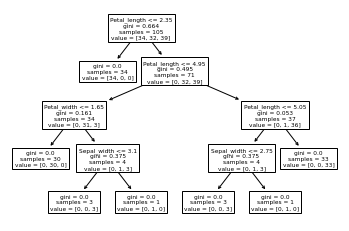

In [11]:
tree.plot_tree(dtree, feature_names=features)

This below line of code is similar to the previous one, but additional parameters are passed.

* The first argument passed to the function is the dtree object that was trained on the training data in the previous step. 

* Argument is feature_names, which is the list of feature names that will be used to label the x-axis of the plot. in this case, features list is passed which contain the names of the columns in the DataFrame: 'Sepal length', 'Sepal width', 'Petal length', 'Petal width'.

* class_names is passed the Classes column from the dataframe df, it represents the class labels that the decision tree is trying to predict.

* rounded is set to True, which will round the corners of the box that represents each node in the decision tree.

* filled is set to True, which will fill the boxes with different colors depending on the class predicted by the decision tree at each leaf node.

These additional parameters make the visual representation of the decision tree more informative, it helps to understand the decision-making process of the model and identify any potential issues such as overfitting.

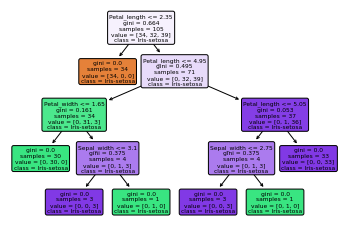

In [13]:
tree.plot_tree(dtree,
               feature_names = features, 
               class_names=df.Classes,
               rounded=True, 
               filled = True);

In [14]:
dot_data = tree.export_graphviz(dtree)

In [15]:
dot_data

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[2] <= 2.35\\ngini = 0.664\\nsamples = 105\\nvalue = [34, 32, 39]"] ;\n1 [label="gini = 0.0\\nsamples = 34\\nvalue = [34, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[2] <= 4.95\\ngini = 0.495\\nsamples = 71\\nvalue = [0, 32, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="X[3] <= 1.65\\ngini = 0.161\\nsamples = 34\\nvalue = [0, 31, 3]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 30\\nvalue = [0, 30, 0]"] ;\n3 -> 4 ;\n5 [label="X[1] <= 3.1\\ngini = 0.375\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0]"] ;\n5 -> 7 ;\n8 [label="X[2] <= 5.05\\ngini = 0.053\\nsamples = 37\\nvalue = [0, 1, 36]"] ;\n2 -> 8 ;\n9 [label="X[1] <= 2.75\\ngini = 0.375\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n8 -> 

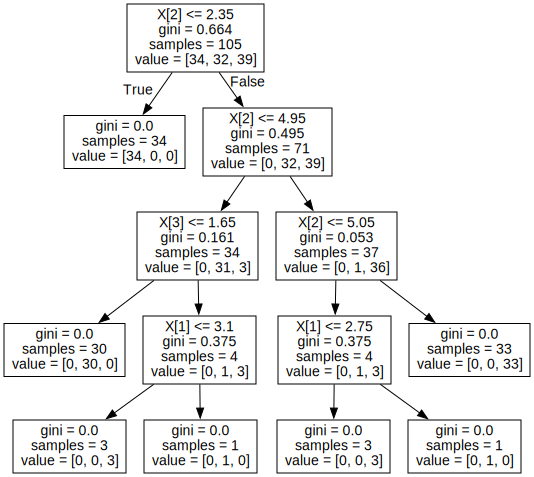

In [16]:
graphviz.Source(source=dot_data, format="png")

Explaining the above decition tree:

The above code is a graph representation of a decision tree created using the Gini impurity method. Each node in the tree represents a split in the data based on a certain feature and threshold, and the outcome of the split is indicated by the child nodes. The values shown in each node include:

* X[i] <= threshold: The feature and threshold used for the split.
* gini = value: The gini impurity value at this node, which represents the measure of the uncertainty in the data. A gini value of 0 indicates that the data is completely pure (i.e., all samples belong to the same class).
* samples = count: The number of samples in the data after the split.
* value = [count_class1, count_class2, ...]: The number of samples in each class after the split.

In this decision tree representation, the leaves of the tree represent the final class predictions.

In this particular decision tree, the feature "Petal width" is used as the root node, and it splits the data based on the threshold value of 0.75. The gini value of 0.664 at the root node represents the impurity of the data before the split. The samples value represents the number of samples present at that node. The value array represents the number of samples for each class present at that node.

The tree then splits further based on the other features such as "Petal length", "Sepal width" etc. with different threshold values. Each internal node has a gini value which represents the impurity of the data after the split. The leaves of the tree represent the class labels, and the gini value is 0 which means that all the samples at that node belong to the same class.

## Test the model

### Training Data

Using the predict() method of the dtree object to make predictions on the training data.

The predict() method takes a single argument, which is the input data that you want to make predictions on. In this case, the input data is X_train, which is the features of the training data that was used to fit the decision tree classifier.

The predict() method will return an array of predicted class labels for each sample in the input data. In this case, the predicted class labels will be stored in the variable y_pred_train_gini.

It is important to note that this predictions are made on the training data, which is not a good practice, since the model is supposed to work on unseen data, but we are doing it to check whether the accuracy is 100%.

In [17]:
y_pred_train_gini = dtree.predict(X_train)

Using the accuracy_score() function from the sklearn.metrics library to calculate the accuracy of the decision tree classifier on the training data.

The accuracy_score() function takes two arguments:

* y_train is the true class labels of the training data.
* y_pred_train_gini is the predicted class labels of the training data, which is obtained from the predict() method on the dtree object.

The function returns a single float value between 0 and 1, where a value of 1 represents a perfect prediction and 0 represents no prediction at all.

The output is a string 'Training-set accuracy score: 0.9571' which shows the accuracy score of the model on the training set.

In this case we are expecting 1.000 since the data used for building the model is the same.

In [18]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


Using the predict() method of the dtree object to make predictions on the test data now.

The predict() method takes a single argument, which is the input data that you want to make predictions on. In this case, the input data is X_test, which is the features of the test data that was split from the original data.

The predict() method will return an array of predicted class labels for each sample in the input data. In this case, the predicted class labels will be stored in the variable y_pred_test_gini.

These predictions are made on the test data, which is the data the model has not seen yet. The accuracy score of these predictions will give a better idea of how well the model is generalizing to unseen data.

### Test Data

In [19]:
y_pred_test_gini = dtree.predict(X_test)

Using the accuracy_score() function again from the sklearn.metrics library to calculate the accuracy of the decision tree classifier on the test data.

The accuracy_score() function takes two arguments:

y_test is the true class labels of the test data.
y_pred_test_gini is the predicted class labels of the test data, which is obtained from the predict() method on the dtree object.
The function returns a single float value between 0 and 1, where a value of 1 represents a perfect prediction and 0 represents no prediction at all.

This line of code is printing the accuracy score of the model on the test set. With this score, one can get an idea of how well the model is generalizing to unseen data.

The accuracy_score is calculated as the number of correct predictions made by a classifier divided by the total number of predictions. The formula is:

accuracy_score = (number of correct predictions) / (total number of predictions)

In other words, the accuracy score measures how many of the predictions made by the classifier are correct. This is a simple and straightforward evaluation metric that is useful for classifiers that are not optimized for specific metrics like precision, recall, or F1 score.

In [28]:
print('Test-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_gini)))

Test-set accuracy score: 0.9778


Precision is a metric that measures the number of true positive predictions made by a classifier as a proportion of all positive predictions made. Mathematically, it is defined as the number of true positive predictions divided by the sum of the number of true positive and false positive predictions. In scikit-learn, the precision_score function calculates the precision for binary or multiclass classification problems, given the true labels and the predicted labels.

* precision = true_positive / (true_positive + false_positive)

In multi-class classification, precision can be calculated using macro, weighted, or micro averaging:

Macro averaging: calculates precision for each class and takes the average.

Weighted averaging: calculates precision for each class, takes weighted average of them, weighted by the number of samples in each class.

Micro averaging: aggregates the contributions of all classes to compute the average precision. It takes into account true and false positives of all classes and considers the total number of samples.

In [44]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test_gini, average='macro'))

Precision: 0.972


The recall score (also known as the sensitivity or the true positive rate) is a metric used to evaluate the performance of a binary classifier. It is calculated as the ratio of true positive predictions (i.e., the number of correct positive predictions) to the total number of actual positive instances in the data set. The formula for recall is:

* Recall = (True Positives) / (True Positives + False Negatives)

In [41]:
print('Recall: %.3f' % recall_score(y_test, y_pred_test_gini, average='macro'))

Recall: 0.981


F1 score is the harmonic mean of precision and recall, and is used to evaluate the overall performance of a binary classifier. It is defined as follows:

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

where Precision is the fraction of True Positives among the instances predicted as positive, and Recall is the fraction of True Positives among the positive instances in the ground truth. A high F1 score indicates a good balance between precision and recall, and that the classifier is doing a good job of accurately identifying positive instances while also avoiding false positives.

In [40]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred_test_gini, average='macro'))

F1 Score: 0.976


## Summary

A Decision Tree model is created using the iris dataset. The tree splits the data based on conditions such as "Petal_length <= 2.35" or "Petal_width <= 1.65". At each split, the model calculates the "gini" value, which represents the impurity of the split, and the number of samples in that split. The tree eventually splits the data into leaves, which contain a single class. The tree has a test set accuracy score of 0.9778, precision of 0.972, recall of 0.981 and a F1 score of 0.976, indicating good performance in classifying the target values in the iris dataset.

In this decision tree, the training-set accuracy score is 1, which means that the decision tree is able to correctly classify all the samples in the training set. The test-set accuracy score is also high, indicating that the decision tree generalizes well to unseen data.

Results show that the tree classifier is performing well on the iris dataset. A test set accuracy of 0.9778 means that 97.78% of the target values in the test set were correctly classified. A precision of 0.972 means that the model is good at not labelling a non-target as target. A recall of 0.981 indicates that the model is good at finding all the target samples. The F1 score of 0.976 is a weighted average of precision and recall, where high F1 score indicates a good balance between precision and recall.